# Test Notebook for German Credit Risk Dataset from Kaggle 

(https://www.kaggle.com/datasets/uciml/german-credit?resource=download)

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('german_credit_data.csv')

# Explorative Data Analysis

In [47]:
print(df.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


In [48]:
print(df.shape)


(1000, 11)


In [49]:
print(df.columns)


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [51]:
df.describe()

Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000

In [52]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)

# Classification

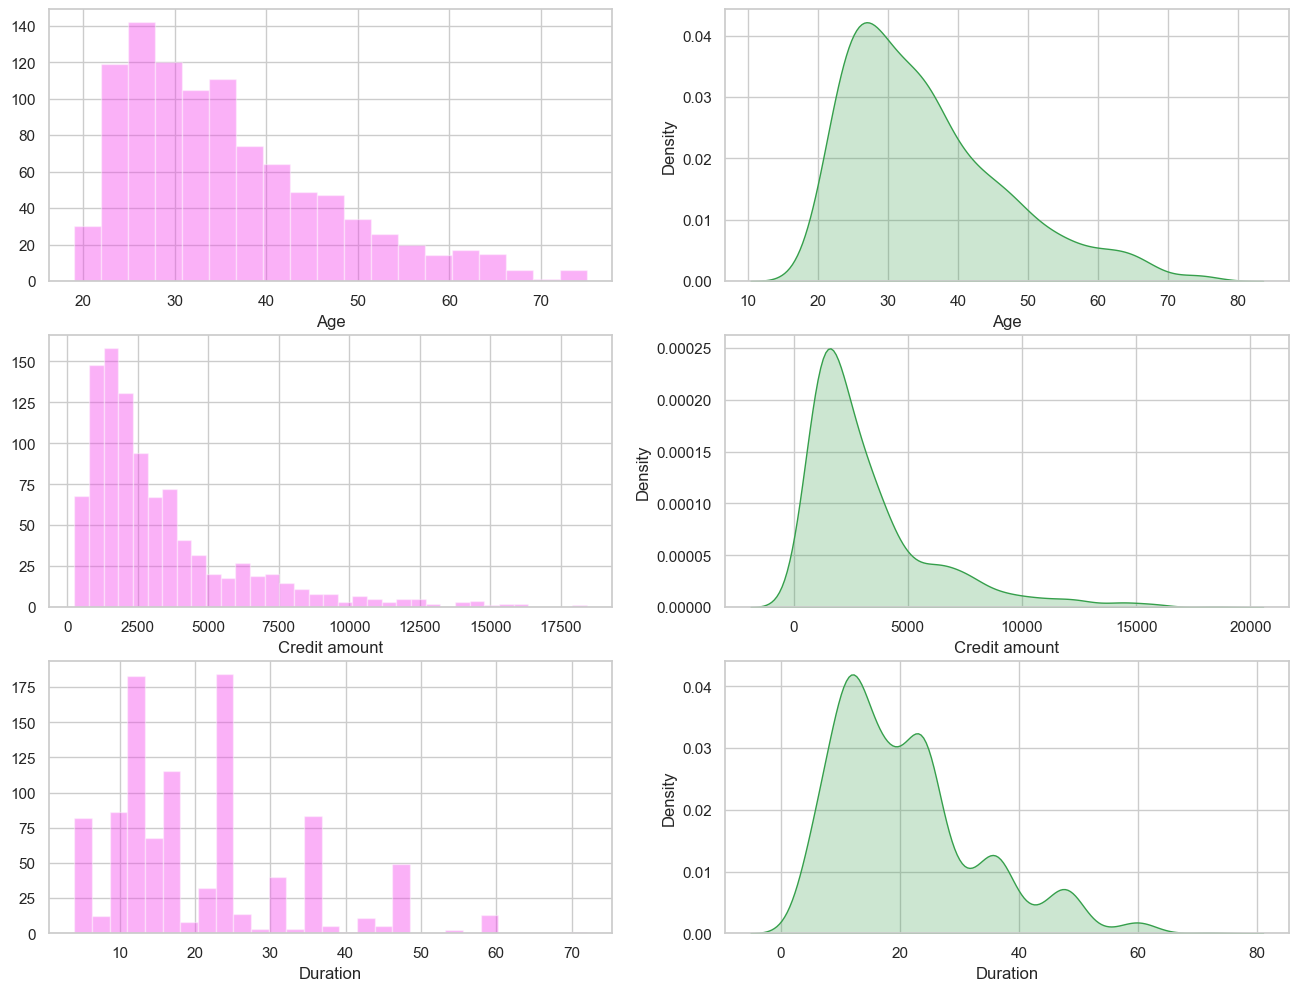

In [53]:
sns.set(font_scale=1,style="whitegrid")
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(16,12))
cat_list=["Age","Credit amount","Duration"]
count=0
for i in range(3):
    sns.distplot(df[cat_list[count]],ax=ax[i][0],kde=False,color="#F43EEC")
    sns.kdeplot(df[cat_list[count]],ax=ax[i][1],shade=True,color="#359F4B")
    count+=1

In [54]:
df["Monthly pay"] = (df["Credit amount"] / df["Duration"])
df["Credit amount^2"] = df["Credit amount"]**2

In [55]:
df.insert(1,"Cat Age",np.NaN)
df.loc[df["Age"]<25,"Cat Age"]="0-25"
df.loc[((df["Age"]>=25) & (df["Age"]<30)),"Cat Age"]="25-30"
df.loc[((df["Age"]>=30) & (df["Age"]<35)),"Cat Age"]="30-35"
df.loc[((df["Age"]>=35) & (df["Age"]<40)),"Cat Age"]="35-40"
df.loc[((df["Age"]>=40) & (df["Age"]<50)),"Cat Age"]="40-50"
df.loc[((df["Age"]>=50) & (df["Age"]<76)),"Cat Age"]="50-75"

In [56]:
df.insert(9,"Cat Duration",df["Duration"])
for i in df["Cat Duration"]:
    if i<12:
        df["Cat Duration"]=df["Cat Duration"].replace(i,"0-12")
    elif (i>=12) and (i<24):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"12-24")
    elif (i>=24) and (i<36):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"24-36")
    elif (i>=36) and (i<48):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"36-48")
    elif (i>=48) and (i<60):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"48-60")
    elif (i>=60) and (i<=72):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"60-72")

In [57]:
df.insert(4,"Cat Job",df["Job"])
df["Cat Job"]=df["Cat Job"].astype("category")
df["Cat Job"]=df["Cat Job"].replace(0,"unskilled")
df["Cat Job"]=df["Cat Job"].replace(1,"resident")
df["Cat Job"]=df["Cat Job"].replace(2,"skilled")
df["Cat Job"]=df["Cat Job"].replace(3,"highly skilled")

In [58]:
df["Job"]=pd.Categorical(df["Job"],categories=[0,1,2,3],ordered=True)
df["Cat Age"]=pd.Categorical(df["Cat Age"],categories=['0-25','25-30', '30-35','35-40','40-50','50-75'])
df["Cat Duration"]=pd.Categorical(df["Cat Duration"],categories=['0-12','12-24', '24-36','36-48','48-60','60-72'])

In [60]:

df=df.drop(["Unnamed: 0"],axis=1)
df.head()

Cat Age  Age     Sex   Cat Job Job Housing Saving accounts Checking account  \
0   50-75   67    male   skilled   2     own             NaN           little   
1    0-25   22  female   skilled   2     own          little         moderate   
2   40-50   49    male  resident   1     own          little              NaN   
3   40-50   45    male   skilled   2    free          little           little   
4   50-75   53    male   skilled   2    free          little           little   

   Credit amount Cat Duration  Duration              Purpose  Risk  \
0           1169         0-12         6             radio/TV  good   
1           5951        48-60        48             radio/TV   bad   
2           2096        12-24        12            education  good   
3           7882        36-48        42  furniture/equipment  good   
4           4870        24-36        24                  car   bad   

   Monthly pay  Credit amount^2  
0   194.833333          1366561  
1   123.979167         35414401  
2   174.666667          4393216  
3   187.666667         62125924  
4   202.916667         23716900

# Data Preprocessing

In [61]:
df["Age"],df["Duration"],df["Job"]=df["Cat Age"],df["Cat Duration"],df["Cat Job"]
df=df.drop(["Cat Age","Cat Duration","Cat Job"],axis=1)

In [63]:
liste_columns=list(df.columns)
liste_columns.remove("Sex")
liste_columns.remove("Risk")
liste_columns.remove("Credit amount")
liste_columns.remove("Monthly pay")
liste_columns.remove("Credit amount^2")

In [64]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Sex"]=label.fit_transform(df["Sex"])
df["Risk"]=label.fit_transform(df["Risk"])
df=pd.get_dummies(df,columns=liste_columns,prefix=liste_columns)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df["Credit amount"]=scaler.fit_transform(df[["Credit amount"]])
df["Monthly pay"]=scaler.fit_transform(df[["Monthly pay"]])
df["Credit amount^2"]=scaler.fit_transform(df[["Credit amount^2"]])

In [66]:
df.head()

Sex  Credit amount  Risk  Monthly pay  Credit amount^2  Age_0-25  \
0    1       0.050567     1     0.069461         0.003842     False   
1    0       0.313690     0     0.040642         0.104166      True   
2    1       0.101574     1     0.061259         0.012761     False   
3    1       0.419941     1     0.066546         0.182872     False   
4    1       0.254209     0     0.072749         0.069699     False   

   Age_25-30  Age_30-35  Age_35-40  Age_40-50  ...  Duration_48-60  \
0      False      False      False      False  ...           False   
1      False      False      False      False  ...            True   
2      False      False      False       True  ...           False   
3      False      False      False       True  ...           False   
4      False      False      False      False  ...           False   

   Duration_60-72  Purpose_business  Purpose_car  Purpose_domestic appliances  \
0           False             False        False                        False   
1           False             False        False                        False   
2           False             False        False                        False   
3           False             False        False                        False   
4           False             False         True                        False   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0              False                        False              True   
1              False                        False              True   
2               True                        False             False   
3              False                         True             False   
4              False                        False             False   

   Purpose_repairs  Purpose_vacation/others  
0            False                    False  
1            False                    False  
2            False                    False  
3            False                    False  
4            False                    False  

[5 rows x 39 columns]

# Models

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,auc,classification_report

In [91]:
X=df.drop(["Risk"],axis=1)
Y=df["Risk"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
cart_model=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=54,min_samples_split=2).fit(X_train,Y_train)

In [70]:
print("Train Accuracy Score : ",accuracy_score(Y_train,cart_model.predict(X_train)))
print("Test Accuracy Score : ",accuracy_score(Y_test,cart_model.predict(X_test)))

Train Accuracy Score :  0.7571428571428571
Test Accuracy Score :  0.71


<Axes: >

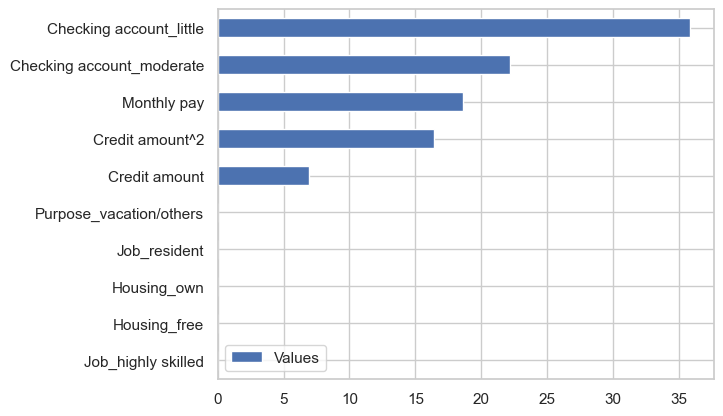

In [74]:
Importance=pd.DataFrame({"Values":cart_model.feature_importances_*100},index=list(X_test.columns))
Importance.sort_values("Values",inplace=True,ascending=True)
Importance[28:].plot.barh()

## Gradient Boosting Model

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(learning_rate = 0.01,max_depth = 5,min_samples_split = 10,n_estimators = 100).fit(X_train, Y_train)

In [72]:
print("Train Accuracy Score : ",accuracy_score(Y_train,gbm_model.predict(X_train)))
print("Test Accuracy Score : ",accuracy_score(Y_test,gbm_model.predict(X_test)))

Train Accuracy Score :  0.8385714285714285
Test Accuracy Score :  0.74


<Axes: >

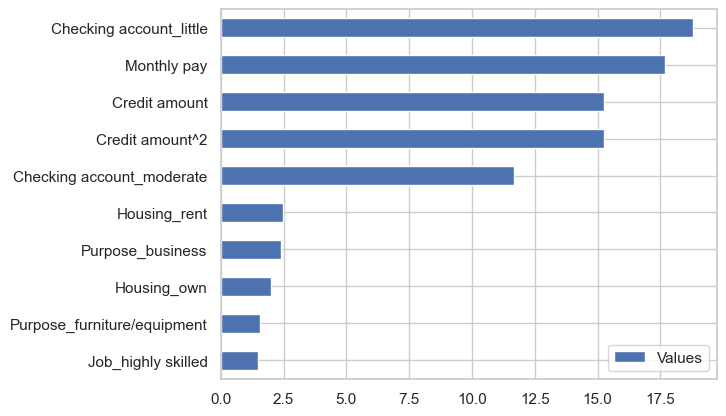

In [73]:
Importance=pd.DataFrame({"Values":gbm_model.feature_importances_*100},index=list(X_test.columns))
Importance.sort_values("Values",inplace=True,ascending=True)
Importance[28:].plot.barh()

## XGBoost Model

In [76]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate = 0.05, max_depth = 5,n_estimators=100,subsample=0.8).fit(X_train,Y_train)

In [77]:
print("Train Accuracy Score : ",accuracy_score(Y_train,xgb_model.predict(X_train)))
print("Test Accuracy Score : ",accuracy_score(Y_test,xgb_model.predict(X_test)))

Train Accuracy Score :  0.8985714285714286
Test Accuracy Score :  0.76


<Axes: >

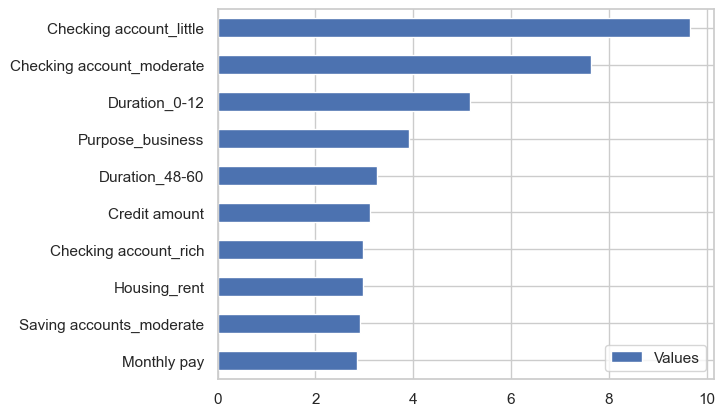

In [78]:
Importance=pd.DataFrame({"Values":xgb_model.feature_importances_*100},index=list(X_test.columns))
Importance.sort_values("Values",inplace=True,ascending=True)
Importance[28:].plot.barh()

## LightGBM

In [80]:
from lightgbm import LGBMClassifier
lgbm_model=LGBMClassifier(learning_rate=0.02,max_depth=3,min_child_samples=10,n_estimators=200,subsample=0.6).fit(X_train,Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 486, number of negative: 214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.694286 -> initscore=0.820233
[LightGBM] [Info] Start training from score 0.820233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [81]:
print("Train Accuracy Score : ",accuracy_score(Y_train,lgbm_model.predict(X_train)))
print("Test Accuracy Score : ",accuracy_score(Y_test,lgbm_model.predict(X_test)))

Train Accuracy Score :  0.8157142857142857
Test Accuracy Score :  0.7366666666666667


<Axes: >

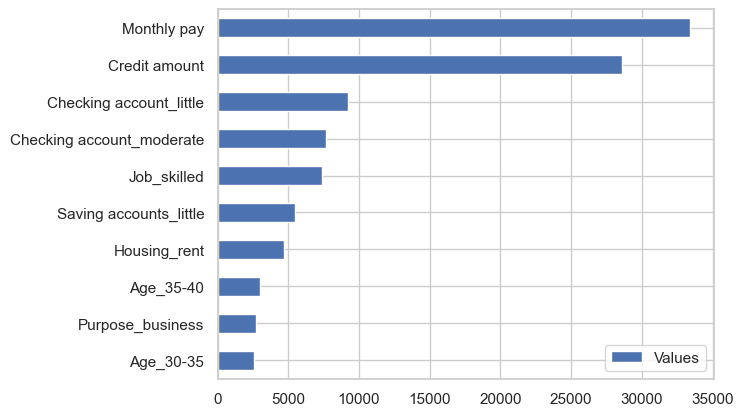

In [82]:

Importance=pd.DataFrame({"Values":lgbm_model.feature_importances_*100},index=list(X_test.columns))
Importance.sort_values("Values",inplace=True,ascending=True)
Importance[28:].plot.barh()

# SHAP

In [102]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

shap.initjs()

In [92]:
# Explain and vizualize predictions
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X)

In [100]:
print(explainer.expected_value)

0.9724941711360852


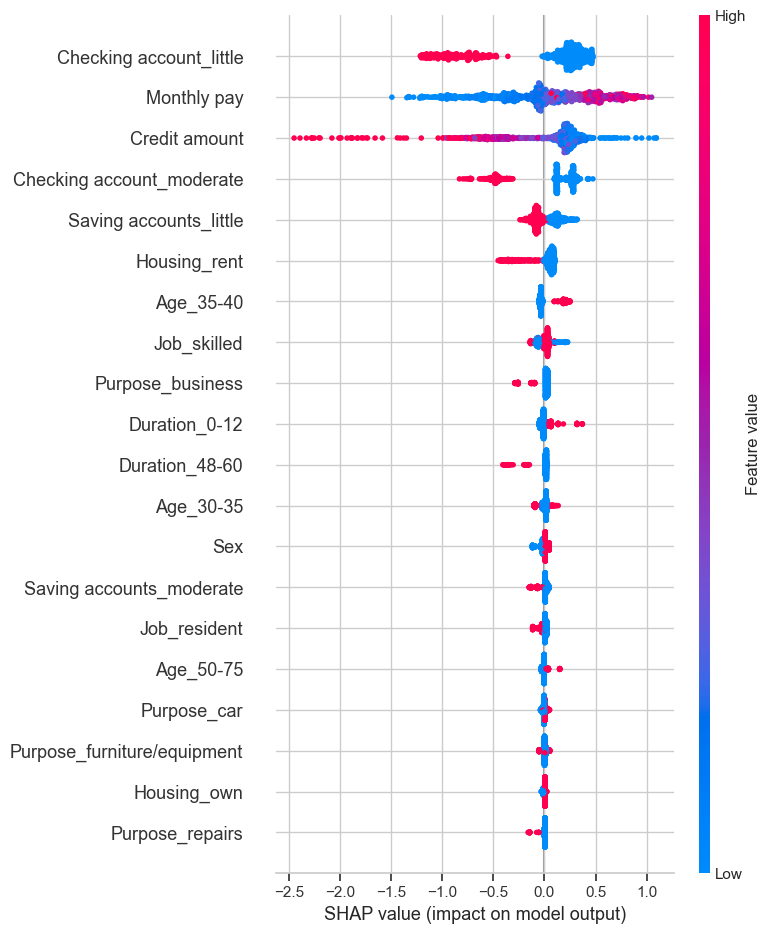

In [106]:
shap.summary_plot(shap_values, X)

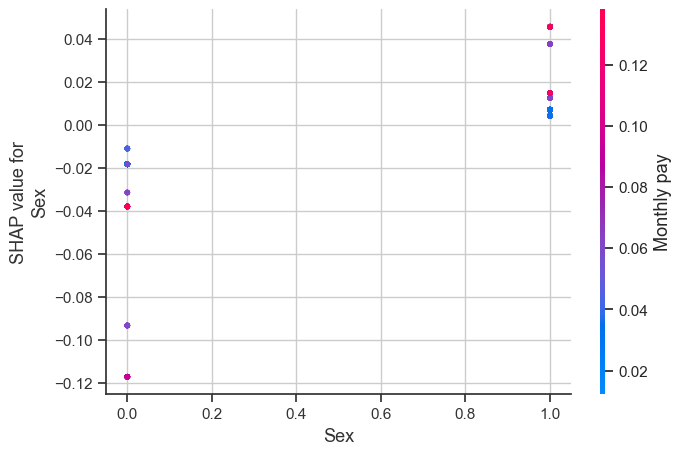

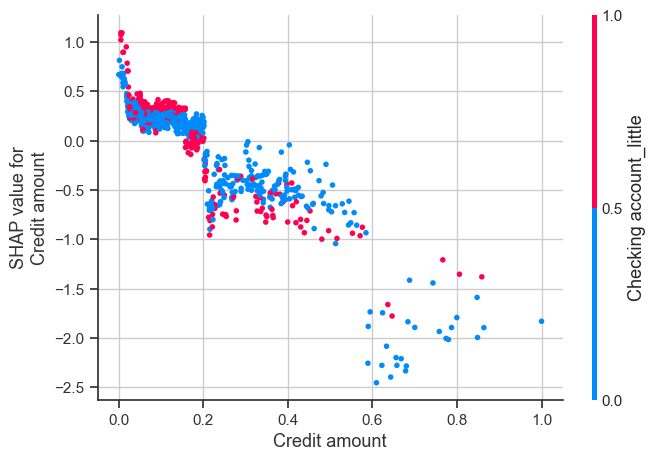

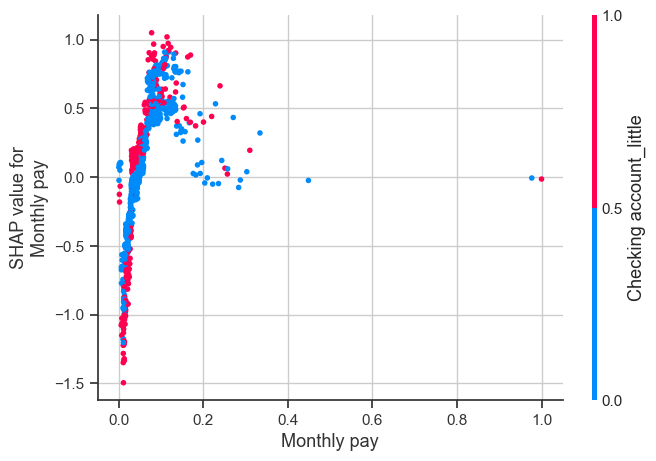

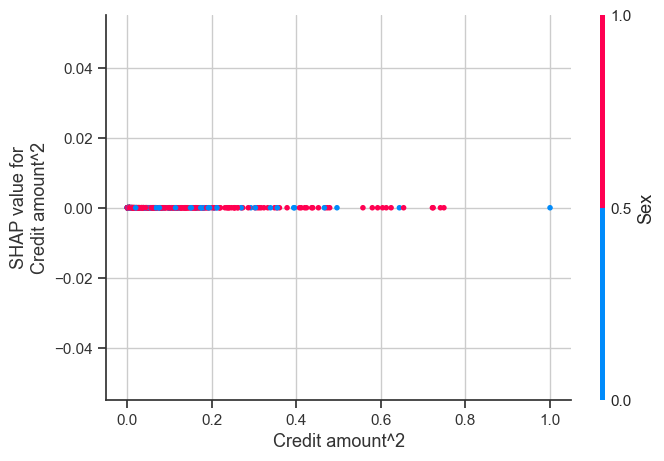

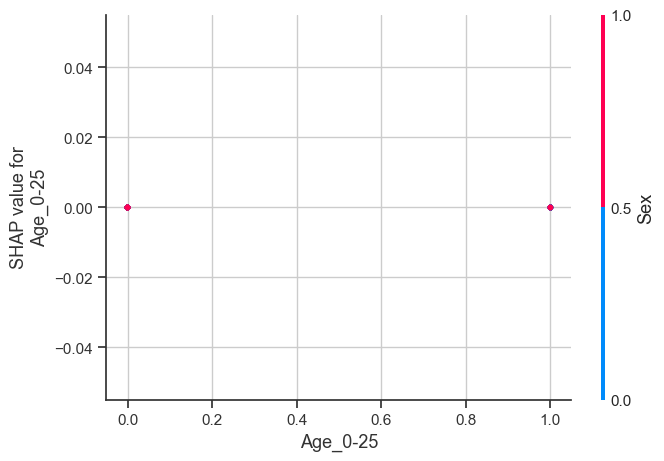

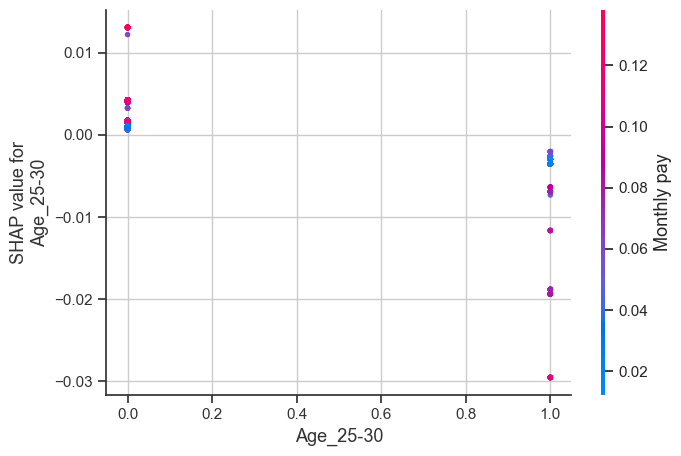

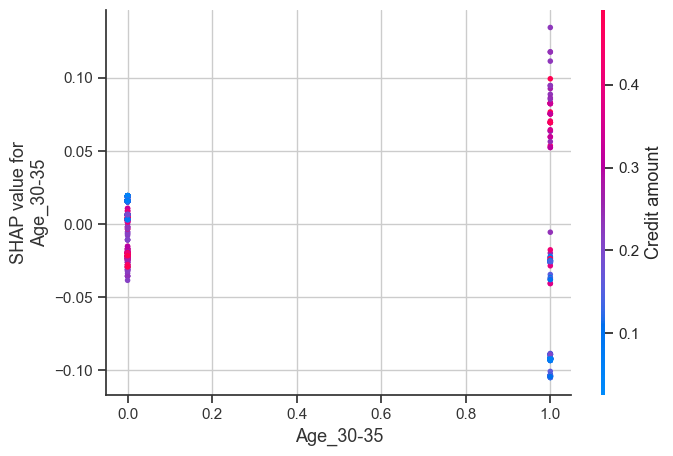

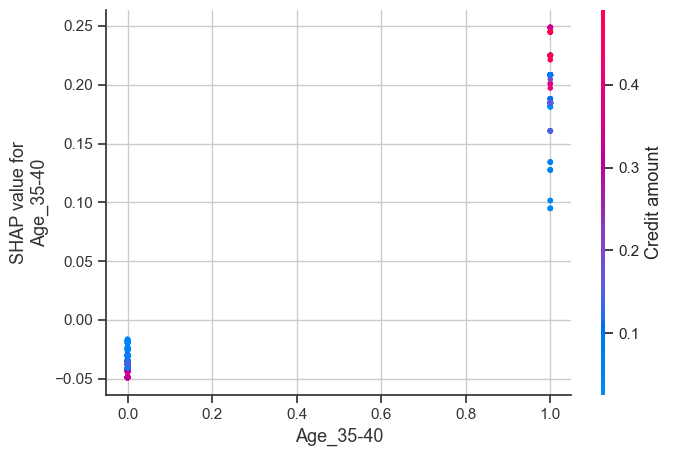

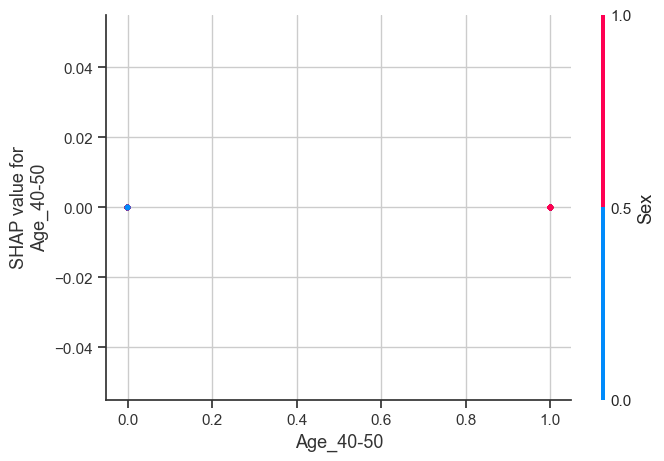

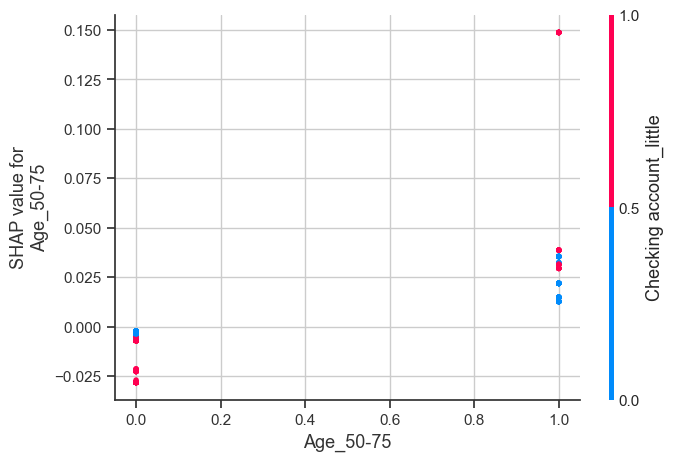

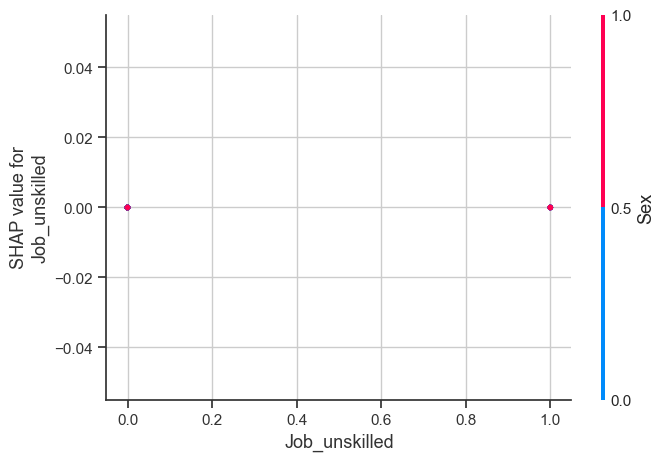

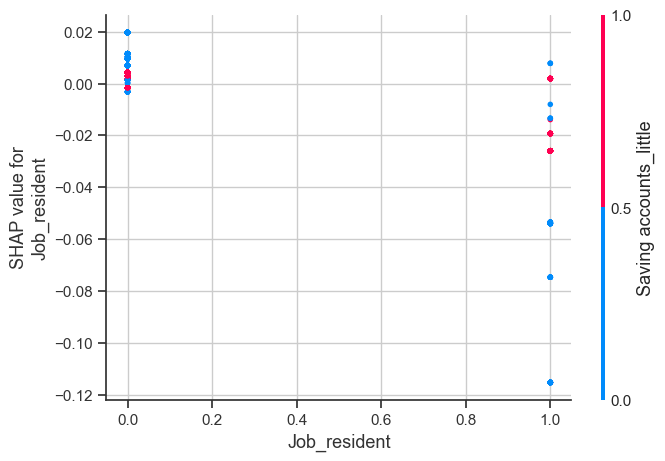

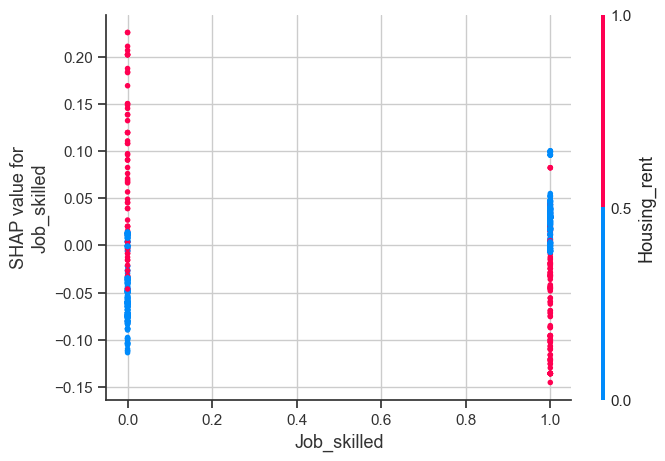

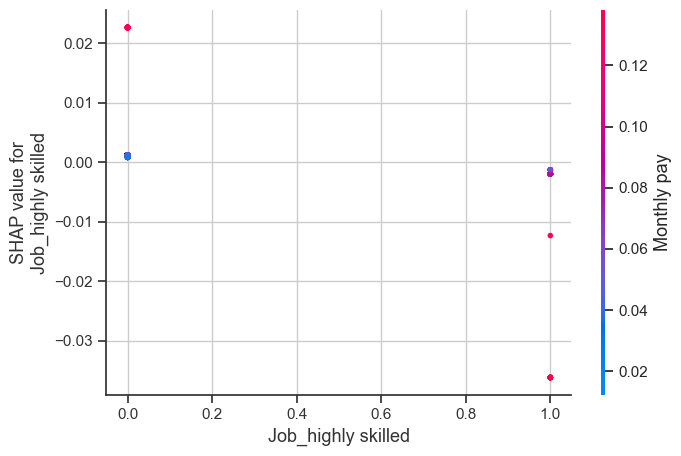

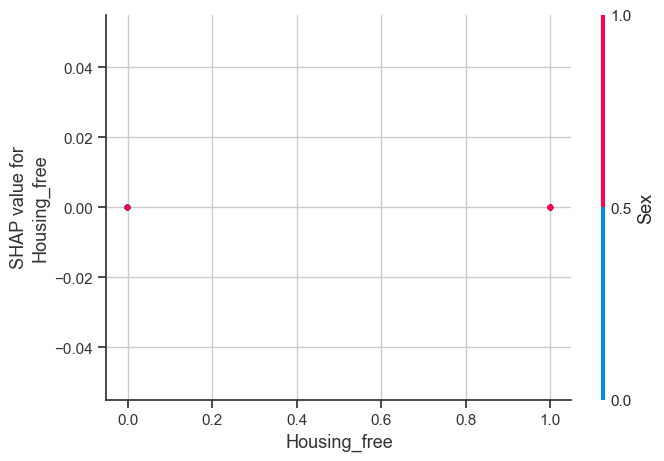

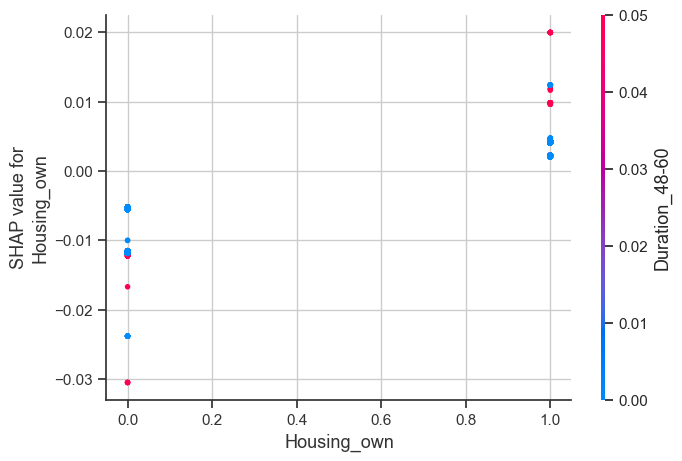

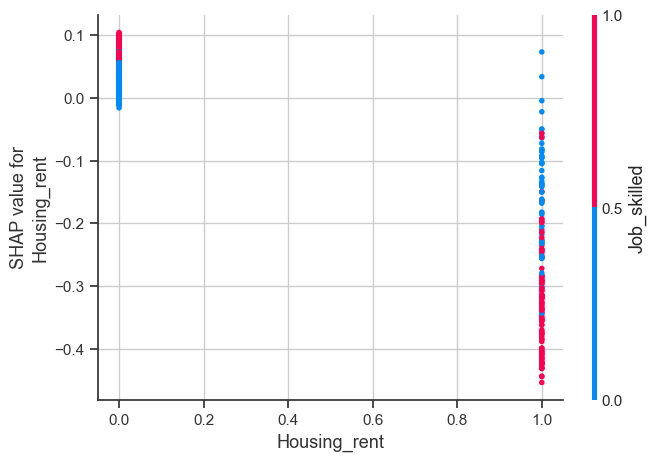

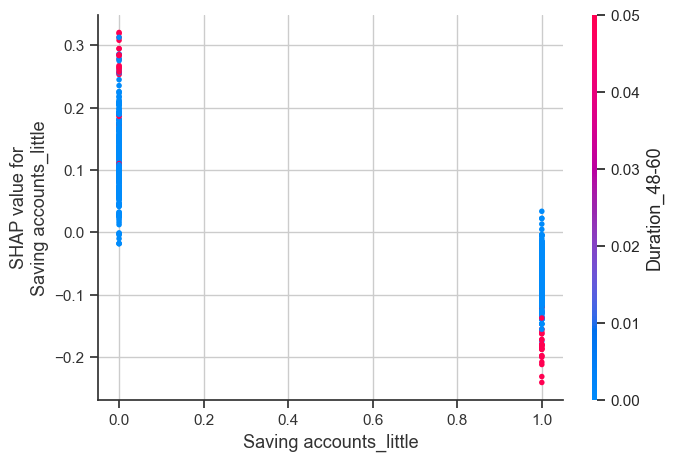

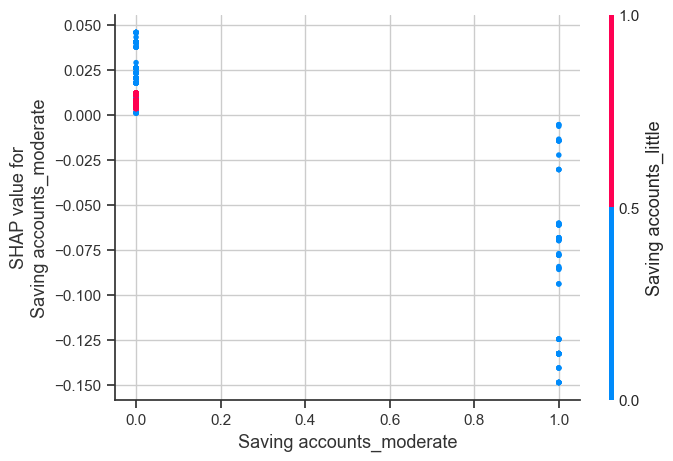

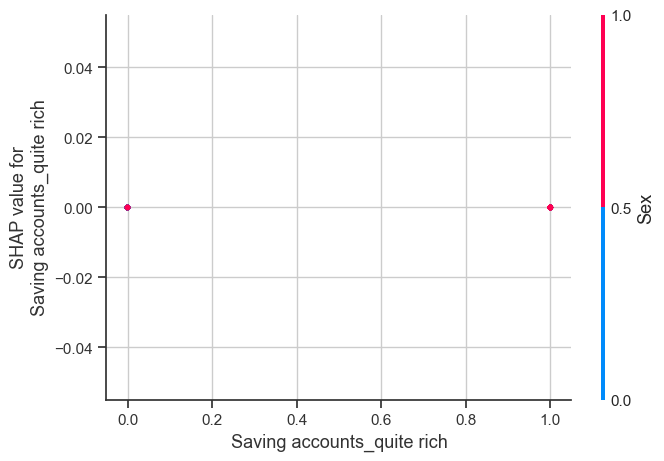

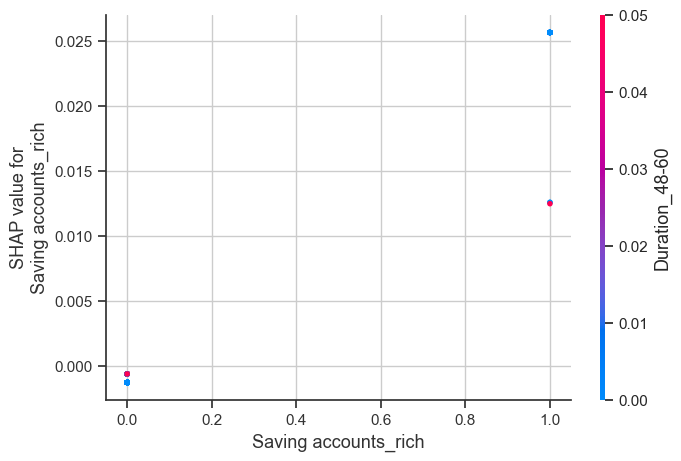

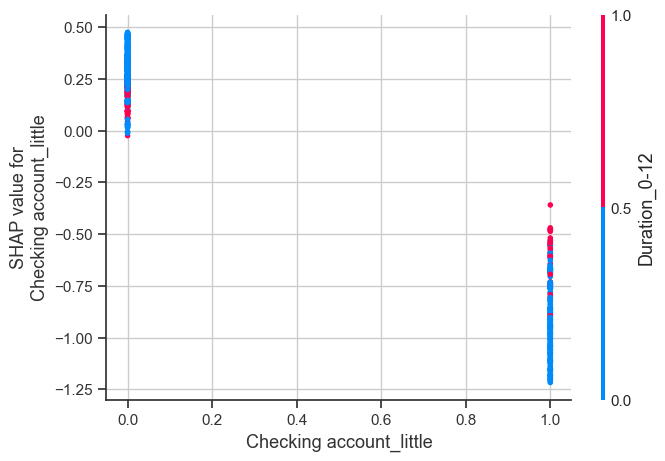

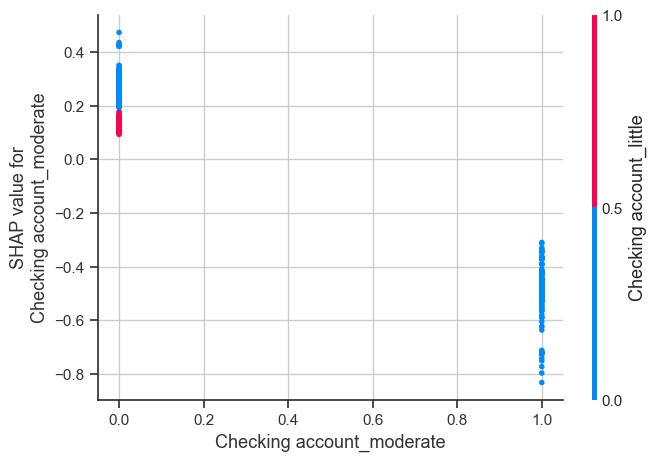

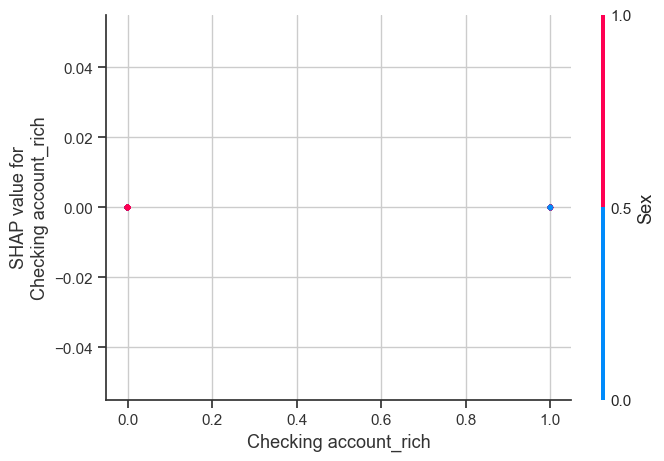

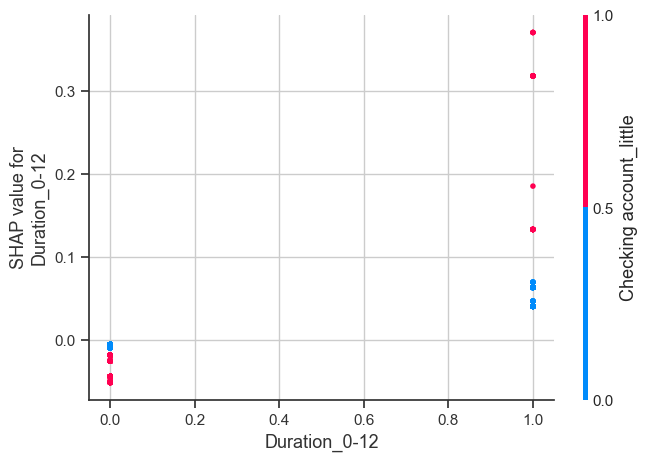

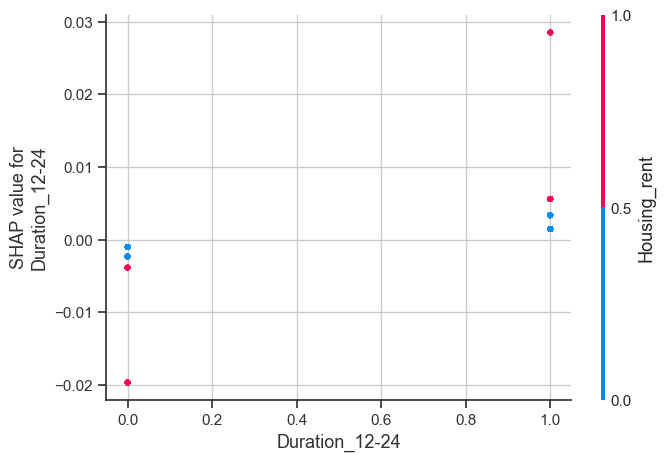

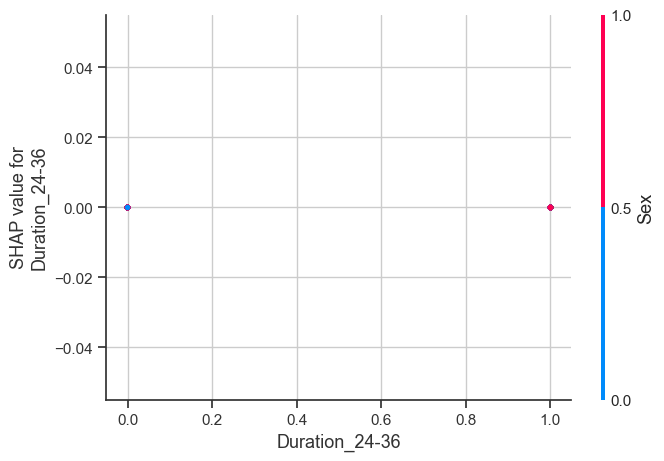

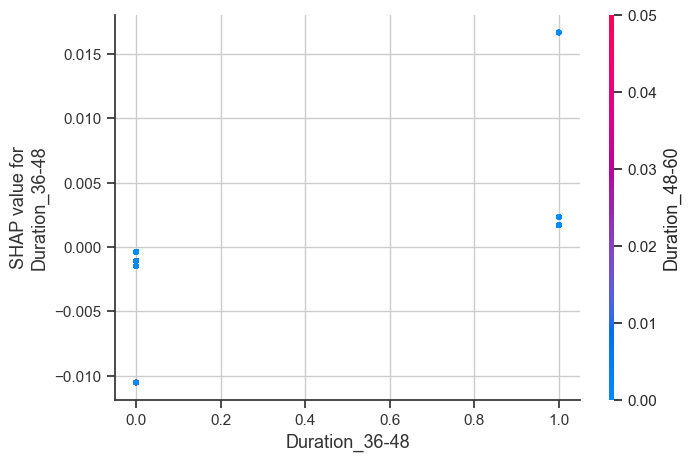

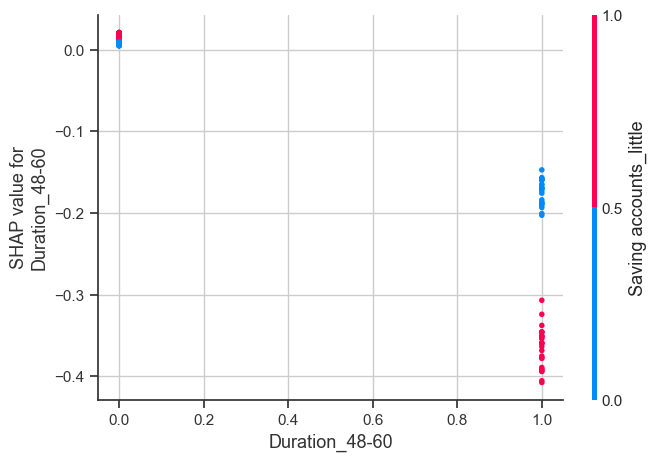

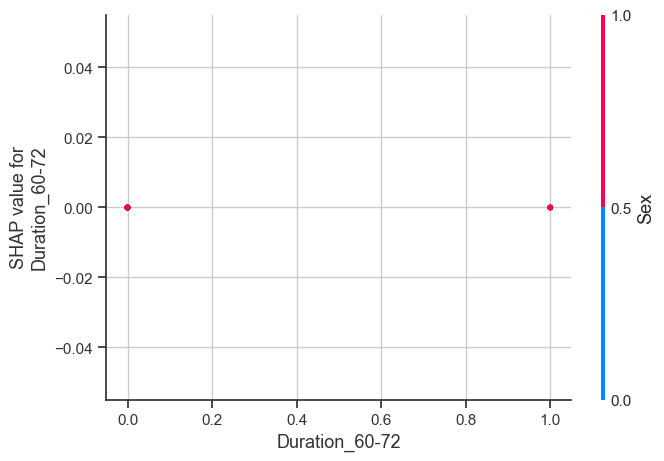

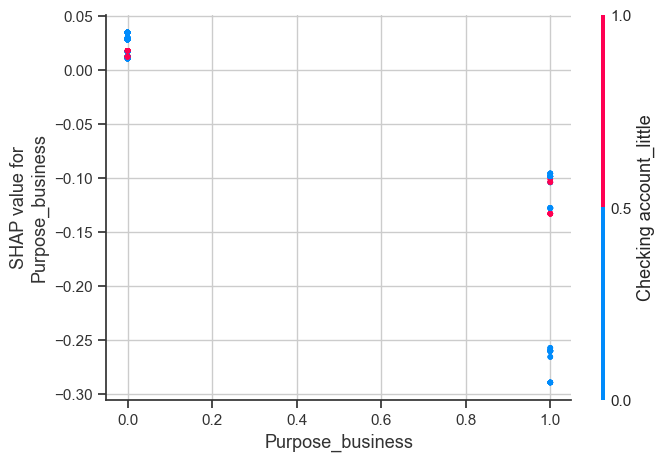

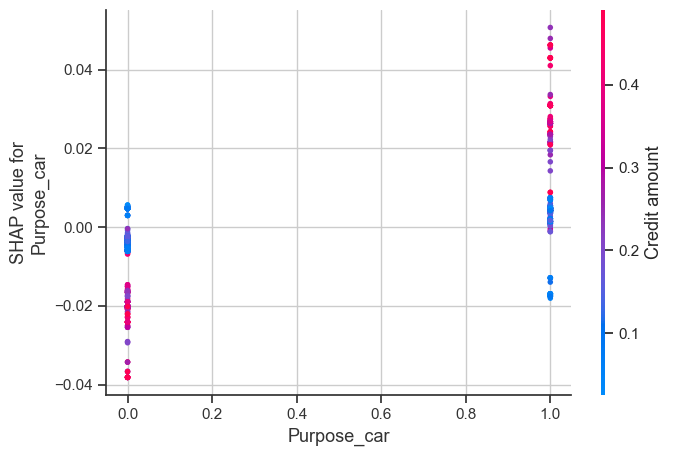

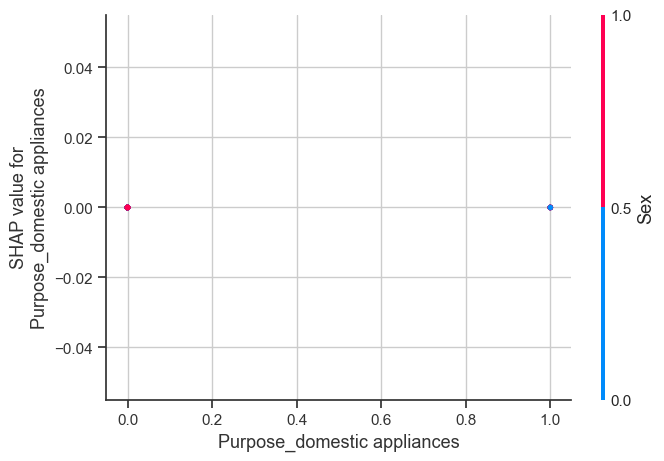

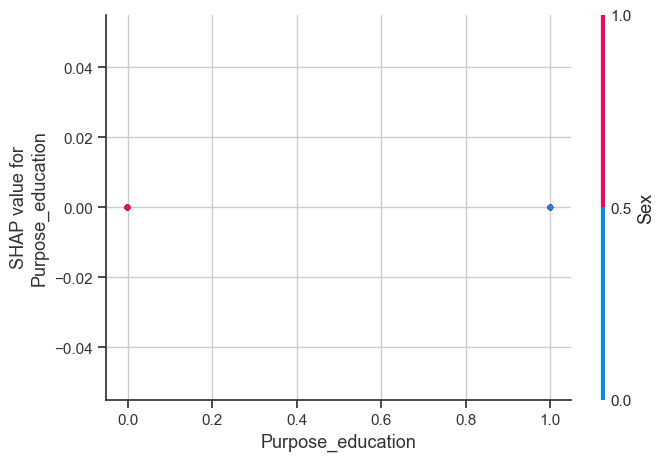

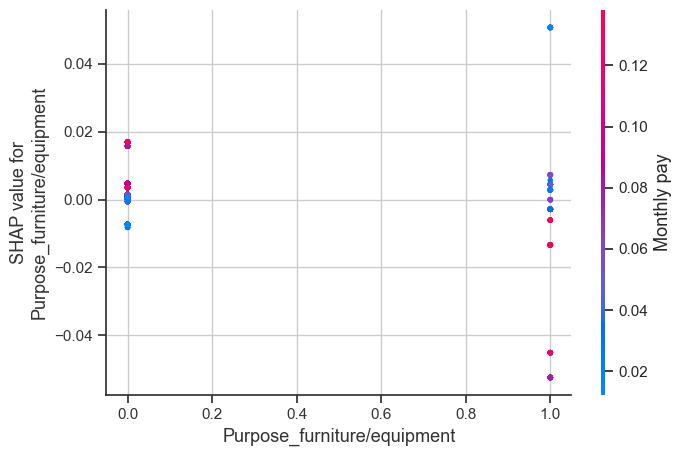

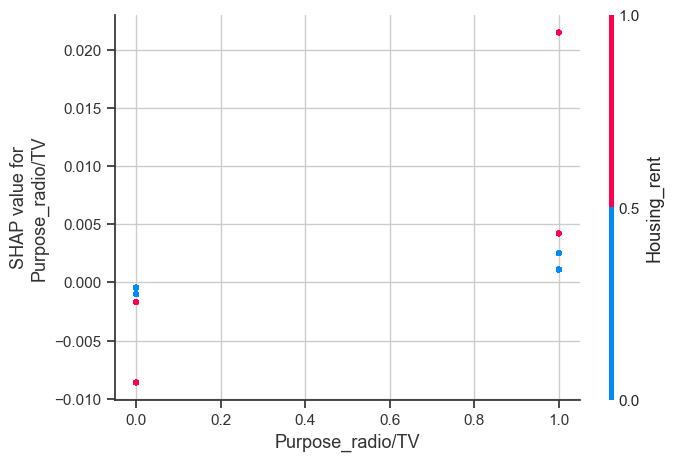

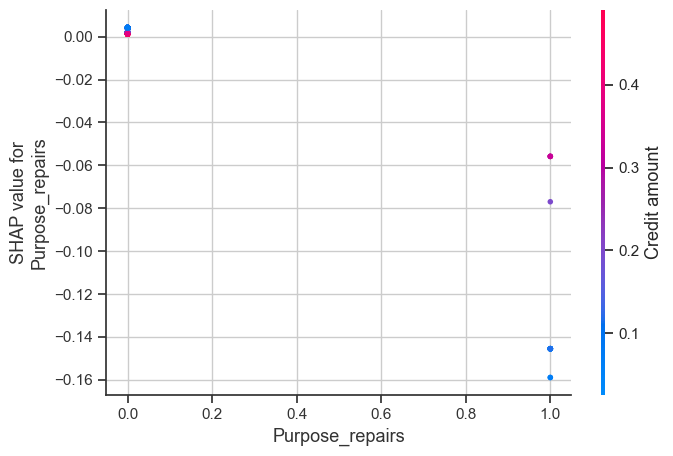

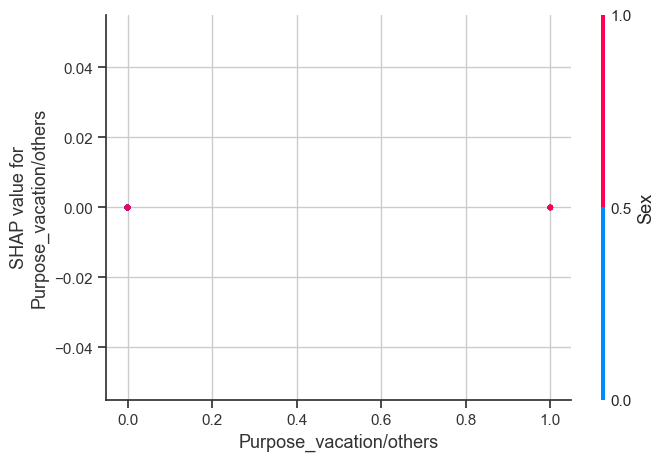

In [109]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)

In [105]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [103]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X.iloc[:1000,:])